In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("ds1_train.csv")

In [3]:
X = df.drop(['y'], axis =1)

In [4]:
y = df['y']

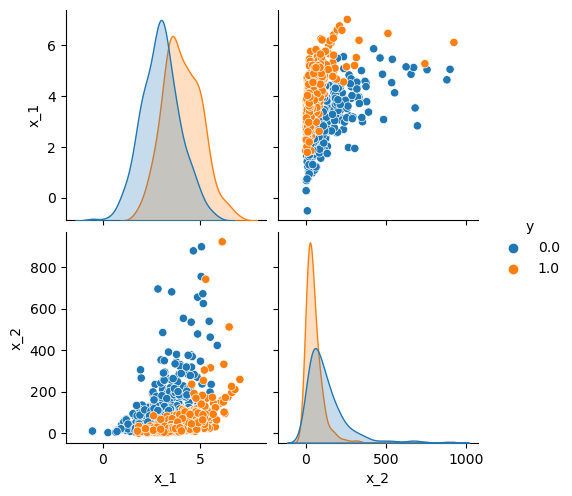

In [5]:
sns.pairplot(df, hue = 'y')

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [8]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly.shape

(600, 5)

In [9]:
lr = LogisticRegression()
lr.fit(X_poly,y_train)

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
print(poly.powers_)

[[1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [11]:
w1, w2, w11, w12, w22 = lr.coef_[0]
b = lr.intercept_[0]

In [12]:
def boundary(x1):
  # returns x2 on the boundary for a given x1
  # we solve square equation
  # a x^2 + b x + c = 0 
  # --> x = (-b +- sqrt(b^2 - 4ac)) / 2a
    a_ = w22
    b_ = w2 + w12 * x1
    c_ = b + w1*x1 + w11*x1**2
    tmp = b_**2 - 4*a_*c_
    if tmp < 0:
        return None
    ans = [(-b_ + tmp**0.5) / (2*a_), (-b_ - tmp**0.5) / (2*a_)]
    ans.sort()  # smaller first
    return ans

In [14]:
# compute the boundaries
xs = np.linspace(X_scaled[:,0].min(), X_scaled[:,0].max(), num=100)
ys_1 = []
ys_2 = []
for x1 in xs:
    tmp = boundary(x1)
    if tmp is None:
        ys_1.append(None)
        ys_2.append(None)
    else:
        ys_1.append(tmp[0])  # smaller boundary
        ys_2.append(tmp[1])  # larger boundary

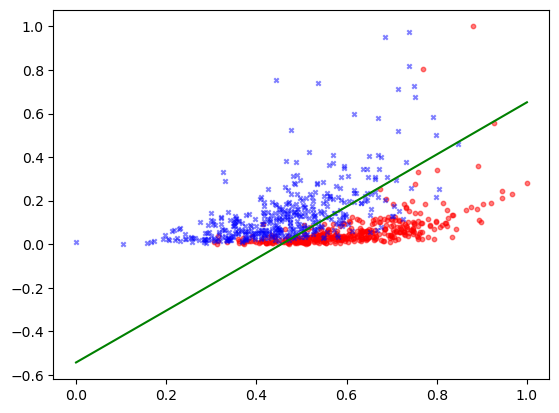

In [29]:
flg = (y > 0)
flg = np.ravel(flg)
plt.scatter(X_scaled[flg,0], X_scaled[flg,1], marker="o", s=10, c="r", alpha = 0.5)
plt.scatter(X_scaled[~flg,0], X_scaled[~flg,1], marker="x", s=10, c="b", alpha = 0.5)
plt.plot(xs, ys_2, c="green")

In [30]:
lr.score(poly.transform(X_test), y_test)

0.835

In [31]:
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.835